 *# Name Surname, matriculation and tutorial time slot of each group member*

  Supreeth Mysore Venkatesh




# Question 1

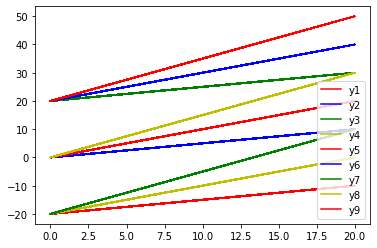

In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
import random 
list1 = []
for i in range(100):
  x = random.randint(0, 20)
  list1.append(x)
arr = np.array(list1)
m1 = 0.5
m2 = 1
m3 = 1.5
c1 = -20
c2 = 0
c3 = 20
for i in range(len(arr)):
  y1=(m1*arr)+c1
  y2=(m1*arr)+c2
  y3=(m1*arr)+c3
  y4=(m2*arr)+c1
  y5=(m2*arr)+c2
  y6=(m2*arr)+c3
  y7=(m3*arr)+c1
  y8=(m3*arr)+c2
  y9=(m3*arr)+c3
plt.plot(arr, y1, '-r', label='y1')
plt.plot(arr, y2, '-b', label='y2')
plt.plot(arr, y3, '-g', label='y3')
plt.plot(arr, y4, '-y', label='y4')
plt.plot(arr, y5, '-r', label='y5')
plt.plot(arr, y6, '-b', label='y6')
plt.plot(arr, y7, '-g', label='y7')
plt.plot(arr, y8, '-y', label='y8')
plt.plot(arr, y9, '-r', label='y9')
plt.legend()

# Question 2

In [2]:
import torch
import numpy as np

x = torch.autograd.Variable(torch.Tensor([10]),requires_grad=True) 
wprime = torch.autograd.Variable(torch.Tensor([(np.pi * x/180)]),requires_grad=True)
w =(np.pi *x)/180
#calculating dfdx
f = torch.sin(w)
dfdx = f.backward()
print(x.grad)
#calculating dfdw
f = torch.sin(wprime)
dfdw = f.backward()
print(wprime.grad)

tensor([0.0172])
tensor([0.9848])


# Question 3

In [0]:
import pandas as pd 
from torch.nn import Linear, Module, MSELoss
dataset = pd.read_csv ('dataset.csv')
import torch

data = torch.tensor(dataset.values)

dataset.head()
Y = data[:, 5]
X = data[:, 0:5]
W = torch.rand(5,1)

# for Lambda = 1

lam=1
W = torch.mm(torch.mm(torch.inverse(torch.add(torch.mm(X.t(),X),torch.eye(5))),X.t()),Y.view([1502,1]))
#print("W=",W)
fx=torch.mm(X,W)
print(fx)
print(fx.shape)
criterion = torch.nn.MSELoss()

loss = 0.5 * criterion(fx,Y.view([1502,1]))
loss = loss + 0.5 * lam * torch.mm(W.t(),W)
print(loss)


# for Lambda = 0.1

lam=0.1
W = torch.mm(torch.mm(torch.inverse(torch.add(torch.mm(X.t(),X),torch.eye(5))),X.t()),Y.view([1502,1]))
#print("W=",W)
fx=torch.mm(X,W)
print(fx)
print(fx.shape)
criterion = torch.nn.MSELoss()

loss = 0.5 * criterion(fx,Y.view([1502,1]))
loss = loss + 0.5 * lam * torch.mm(W.t(),W)
print(loss)

# for Lambda = 100

lam=100
W = torch.mm(torch.mm(torch.inverse(torch.add(torch.mm(X.t(),X),torch.eye(5))),X.t()),Y.view([1502,1]))
#print("W=",W)
fx=torch.mm(X,W)
print(fx)
print(fx.shape)
criterion = torch.nn.MSELoss()

loss = 0.5 * criterion(fx,Y.view([1502,1]))
loss = loss + 0.5 * lam * torch.mm(W.t(),W)
print(loss)

# Question 4

0.0010745004983618855
0.02138800173997879
8.484807949571405e-07
1.2789769243681803e-13
2.4016344468691386e-12
7.993605777301127e-13
7.993605777301127e-13
1.4210854715202004e-12
1.4210854715202004e-14
3.552713678800501e-13
2.2737367544323206e-13
6.004086117172847e-13
9.094947017729282e-13
3.552713678800501e-13
5.115907697472721e-13
1.2789769243681803e-13
8.881784197001252e-14
1.4210854715202004e-14
5.684341886080802e-14
1.4210854715202004e-14
4.298783551348606e-13


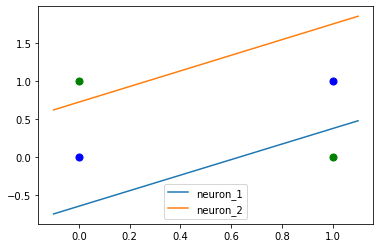

In [3]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = torch.Tensor([[0,0],[0,1], [1,0], [1,1]])
Y = torch.Tensor([0,1,1,0]).view(-1,1)

class XOR(nn.Module):
    def __init__(self, input_dim = 2, output_dim=1):
        super(XOR, self).__init__()
        self.lin1 = nn.Linear(input_dim, 2)
        self.lin2 = nn.Linear(2, output_dim)
    
    def forward(self, x):
        x = self.lin1(x)
        x = torch.sigmoid(x)
        x = self.lin2(x)
        return x

model = XOR()

def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)

weights_init(model)

#Here we used mean squure error for the loss
loss_func = nn.MSELoss()


optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)

epochs = 2001
steps = X.size(0)
for i in range(epochs):
    for j in range(steps):
        data_point = np.random.randint(X.size(0))
        x_var = Variable(X[data_point], requires_grad=True)
        y_var = Variable(Y[data_point], requires_grad=True)
        
        optimizer.zero_grad()
        y_hat = model(x_var)
        loss = loss_func.forward(y_hat, y_var)
        loss.backward()
        optimizer.step()
        
    if i %100 == 0:
        print(loss.item())

model_params = list(model.parameters())

model_weights = model_params[0].data.numpy()
model_bias = model_params[1].data.numpy()

plt.scatter(X.numpy()[[0,-1], 0], X.numpy()[[0, -1], 1], c='blue', s=50)
plt.scatter(X.numpy()[[1,2], 0], X.numpy()[[1, 2], 1], c='green', s=50)

x_1 = np.arange(-0.1, 1.1, 0.1)
y_1 = ((x_1 * model_weights[0,0]) + model_bias[0]) / (-model_weights[0,1])
plt.plot(x_1, y_1)
  
x_2 = np.arange(-0.1, 1.1, 0.1)
y_2 = ((x_2 * model_weights[1,0]) + model_bias[1]) / (-model_weights[1,1])
plt.plot(x_2, y_2)
plt.legend(["neuron_1", "neuron_2"], loc=8)
plt.show()



3.   In this problem we used MSE loss, but we can also use the cross entropy loss. It measures the difference between two probability distributions. It can be used as a loss function when optimizing classification models like logistic regression.

4.   In this example we have only four values for training our network which is not enough for training the net. But we can repeat our training function 1000 or 2000 times s.t. each time our loss will be decrease and network will be trained effectively.

5.   ![alt text](https://ibb.co/KbTyf2W) 
with the help of this link, we tried to illustrate that even if we have 3 linear layers instead of just 1 hidden layer, the result will not change, error will not reduce. Because instead of constructing 3 layers which have linear relationship to each other, we can merge them to one layer and get the same result. All the weight coeffisients will sum up to some other scalar and will affect the nodes linearly.

6.    Neural Network helps us to separate or distingiush two different classes by using non linear function. But with the linear classifiers we can not separate them. A simple example can be XOR function which cannot be separated by a linear function. As shown in the graphic of 4th question, 4 points are inputs of XOR function and the colours represent similar values i.e. blues are 0s and greens are 1s. So, we can say that it is not possible to separate 0s and 1s with the linear function (line).
Remark: If we dont use any non linearity in our neural network, then it behaves same as linear function. In our example above, we used sigmoid function to make our function a non linear.


